In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
import math 


# Implimentation Of SLP using IRIS Dataset

In [ ]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=["Sepal length", "Sepal Width", "Petal Length", "Petal Width","label"])
print(data)

     Sepal length  Sepal Width  Petal Length  Petal Width           label
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
X=data[["Sepal length", "Sepal Width", "Petal Length", "Petal Width"]].to_numpy()
# print(X)
Yi=data[["label"]].to_numpy()
Y=[]
for i in Yi:
  if i=='Iris-setosa':
    Y.append([1,0,0])
  elif i=='Iris-versicolor':  
    Y.append([0,1,0])
  else:
    Y.append([0,0,1])  
print(Y)
print(X.shape)

[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0]

   Training_Accuracy  Testing_Accuracy
0          72.115385         70.666667
1          65.060241         64.666667
2          73.469388         67.333333
3          71.875000         68.000000
4          62.162162         63.333333
5          45.833333         40.666667
6          68.181818         68.666667
7          57.407407         65.333333
8          57.894737         66.000000
9          73.333333         74.000000


   Training_Accuracy  Testing_Accuracy
0          64.444444         66.666667
1          67.500000         66.666667
2          69.230769         66.666667
3          74.444444         69.333333
4          66.666667         68.000000
5          47.457627         41.333333


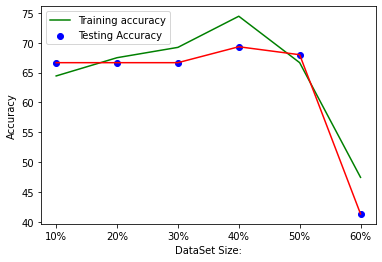

In [ ]:
def check(a):#check function will check in which of the three neurons will be having larger value and accordingly assigning 1 to that and 0 to others
  index=0
  max=0
  for i in range(len(a)):
   if a[i]>max:
    max=a[i]
    index=i
  arr=[]
  for i in range(len(a)):
    if a[i]<0:
      arr.append(0)
    else:
      arr.append(1)
  return arr

def equal(a,b):
  for i in range(len(a)):
    if a[i]!=b[i]:
      return False
  return True

def Accuracy(X,Y,weights):#if on multiplying x*weights we get the same matrix as the resultant matrix the we increment the count and then in total we check whether the given is same or not
  count=0
  for x,y in zip(X,Y):
    predicted=np.matmul(x,weights)
    predictive=check(predicted)
    pred=np.asarray(predictive)
    if equal(pred,y):
      count+=1
  acc=(count/len(Y))*100
  return acc

def SLP(X,Y,epochs,lr):
  weights=np.ones((len(X[0]),3))#we are initializing weights
  for _ in range(epochs):
    for x,y in zip(X,Y):
      # print(x.shape)
      # print(weights.shape)
      predict=np.matmul(x,weights)#predict will be containing the matrix multiplication of input(features+bias)(1x5) and weights(5x3)
      predictive=check(predict)#here we are sending the perdict to sigmoid which would send a matrix of sigmoid values and then sending it to the check function which would return a matrix of [1,0,0] or
                                        #[0,1,0] or [0,0,1] ,this signifies that if a[0]=1 then sesota,a[1]=1 then vesicolor otherwise a[2]=1 then virginica
      pred=np.asarray(predictive)
      delta=y-pred
      weights+=[(lr * delta)*i for i in x]#here we are updating the weight value after each iteration
  accuracy=Accuracy(X,Y,weights)  
  # print("The training accuracy",accuracy)
  return weights,accuracy

def training_and_testing_data(X,Y,test_percentage):
  trainX,testX,trainY,testY=train_test_split(X, Y, test_size=test_percentage,random_state=np.random.randint(10,50))
  w,training_acc=SLP(trainX,trainY,100,0.05)
  test_acc=Accuracy(X,Y,w)
  # print("the testing accuracy-",test_acc)
  return training_acc,test_acc

def ques_d(X,Y):#solution to question d 
  training=[]
  testing=[]
  for i in range(10):
    train,test=training_and_testing_data(X,Y,np.random.uniform(0.1, 0.9))
    training.append(train)
    testing.append(test)
  df=pd.DataFrame({'Training_Accuracy':training, 'Testing_Accuracy':testing})
  df.to_excel("Q1.xlsx")  
  print(df)  

def ques_e(X,Y):##solution to question e
   training=[]
   testing=[]
   for i in range(1,7):
     test_acc=0.1*i
     train,test=training_and_testing_data(X,Y,test_acc)
     training.append(train)
     testing.append(test)
     df=pd.DataFrame({'Training_Accuracy':training, 'Testing_Accuracy':testing})
     df.to_excel("Q2.xlsx")
   print(df)
   S = ['10%','20%','30%','40%','50%','60%']
   plt.plot(S,training,color='g',label='Training accuracy')
   plt.scatter(S,testing,c='b',label="Testing Accuracy")  
   plt.plot(S,testing,color='r')
   plt.xlabel('DataSet Size:')
   plt.ylabel('Accuracy')
   plt.legend()
   plt.show() 

X=np.insert(X,0,1,axis=1)
ques_d(X,Y)
print("\n")
ques_e(X,Y)



# Implimentation Of MLP Using IRIS Dataset

In [ ]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=["Sepal length", "Sepal Width", "Petal Length", "Petal Width","label"])
X=data[["Sepal length", "Sepal Width", "Petal Length", "Petal Width"]].to_numpy()
# print(X)
Yi=data[["label"]].to_numpy()
Y=[]
for i in Yi:
  if i=='Iris-setosa':
    Y.append([1,0,0])
  elif i=='Iris-versicolor':  
    Y.append([0,1,0])
  else:
    Y.append([0,0,1])  
print(Y)
print(X.shape)

[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0]

In [ ]:
class Neural_nets:#defining a class for neural networks having weights,values and the error/delta values that it will have
   def __init__(self,input):
    self.weight = [np.random.random() for i in range(input)]#initially assigning random weights to the neural nets
    self.val = 0
    self.err = 0

def MLP(feat,hid,classes):#this is the initialization part of the mlp where we initialise how many inputs are there to a hidden layer,and after that how many neurons are there in 
                          # hidden layer and how many neurons are there in the output layers
  hidden=[Neural_nets(feat+1) for i in range(hid)]
  output = [Neural_nets(hid+1) for i in range(classes)]
  return [hidden,output]

def activation(weight,input):#this is the function for activation function
  activation = weight[-1]
  for i in range(len(weight)-1):
    activation += weight[i]*input[i]
  return activation

def sigmoid(activation):
  return 1.0 / (1.0 + np.exp(-activation))

def sigmoid_dash(activation):#this is the function for the derivative of sigmoid function
  return (activation)*(1-activation)

def feed_forward(MLP,input):#this function will be having the feed forward part of the back propagation algorithm the input is the input in the to the hidden layer and the last output is the output from the last output layer
  for layer in MLP:
    out=[]
    for neurons in layer:
       z = activation(neurons.weight,input)
       neurons.value = sigmoid(z)
       out.append(neurons.value)
    input = out 
  return input

def backpropagate(MLP,actual):#here actual represents the actual value that will be expected from the output layer for a particular input
  #First for Output Layer
  for i in range(len(MLP[-1])):   
    delta = actual[i]-MLP[-1][i].value
    MLP[-1][i].err = delta*sigmoid_dash(MLP[-1][i].value)
  
  #Then For the hidden layers
  for j in range(len(MLP[0])):
     delta = 0
     for neuron in MLP[1]:
       delta += neuron.weight[j]*neuron.err
     MLP[0][j].err = delta*sigmoid_dash(MLP[0][j].value)

def updation(MLP,input): #here we are updating the weights of all the neurons in each layer after doing first the forward propagation and then backward propagation
  lr=0.005#learning rate
  for layer in MLP:
    for neuron in layer:
      for j in range(len(input)):
        neuron.weight[j] += lr*neuron.err*input[j]
    input = [neuron.value for neuron in layer]

def training(MLP,X,Y,epoch,classes):
  for _ in range(epoch):
    for x,y in zip(X,Y):
      feed_forward(MLP,x)
      backpropagate(MLP,y)
      updation(MLP,x)

def prediction(MLP,X): #this function will return the array containing 1 for the max value of the output neuron and 0 for the rest
  predict=feed_forward(MLP,X)
  maxi=max(predict)
  max_index=predict.index(maxi)
  arr=[0]*len(predict)
  arr[max_index]=1
  return arr

def accuracy(MLP,X,Y):
  count=0
  for x,y in zip(X,Y):
    pred=prediction(MLP,x)
    if pred==y:
      count+=1
  return (count/len(Y))*100

# def training_and_testing_data(X,Y,test_percentage,):
trainX,testX,trainY,testY=train_test_split(X, Y, test_size=0.4,random_state=np.random.randint(10,50))
  

mlp = MLP(4,10,3)#4->input feature,4->no. of neurons in hidden layer,3->no. of neurons in output layer
training(mlp,trainX,trainY,1000,3)
print('Training Accuracy: ',accuracy(mlp,trainX,trainY))
print('Testing Accuracy: ',accuracy(mlp,testX,testY))  

Training Accuracy:  96.66666666666667
Testing Accuracy:  98.33333333333333


In [ ]:
def training_and_testing_data_mlp(X,Y,test_percentage):
  trainX,testX,trainY,testY=train_test_split(X, Y, test_size=test_percentage,random_state=np.random.randint(10,50))
  mlp = MLP(4,10,3)#4->input feature,10->no. of neurons in hidden layer,3->no. of neurons in output layer
  training(mlp,trainX,trainY,1000,3)
  training_acc=accuracy(mlp,trainX,trainY)
  testing_acc=accuracy(mlp,testX,testY)
  # print('Training Accuracy: ',training_acc)
  # print('Testing Accuracy: ',testing_acc)  
  return training_acc,testing_acc

def ques_mlp_d(X,Y):#solution to question d 
  training=[]
  testing=[]
  for i in range(10):
    train,test=training_and_testing_data_mlp(X,Y,np.random.uniform(0.2, 0.9))
    training.append(train)
    testing.append(test)
  df=pd.DataFrame({'Training_Accuracy':training, 'Testing_Accuracy':testing})
  df.to_excel("d_mlp.xlsx")  
  print(df) 

ques_mlp_d(X,Y)

   Training_Accuracy  Testing_Accuracy
0          94.392523        100.000000
1          71.739130         64.423077
2          69.724771         58.536585
3          40.000000         31.304348
4          97.222222         95.614035
5          41.463415         30.275229
6          29.166667         34.126984
7          68.831169         64.383562
8          42.622951         26.966292
9          69.902913         59.574468


   Training_Accuracy  Testing_Accuracy
0          97.037037         93.333333
1          95.833333        100.000000
2          98.076923         95.652174
3          97.777778         96.666667
4          69.333333         64.000000
5          69.491525         64.835165


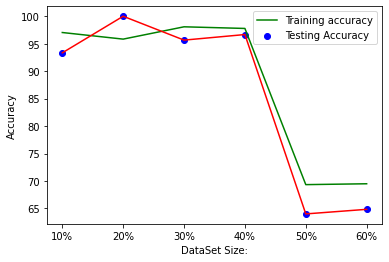

In [ ]:
def ques_mlp_e(X,Y):##solution to question e
   training=[]
   testing=[]
   for i in range(1,7):
     test_acc=0.1*i
     train,test=training_and_testing_data_mlp(X,Y,test_acc)
     training.append(train)
     testing.append(test)
     df=pd.DataFrame({'Training_Accuracy':training, 'Testing_Accuracy':testing})
     df.to_excel("Q2_mlp.xlsx")
   print(df)
   S = ['10%','20%','30%','40%','50%','60%']
   plt.plot(S,training,color='g',label='Training accuracy')
   plt.scatter(S,testing,c='b',label="Testing Accuracy")  
   plt.plot(S,testing,color='r')
   plt.xlabel('DataSet Size:')
   plt.ylabel('Accuracy')
   plt.legend()
   plt.show() 

ques_mlp_e(X,Y)
